# Word Vectors

____
**References** [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)

(This course is the gold mine by Professor Christopher Manning from Stanford University, that you wouldn't want to miss)

## Introduction

If we want to solve Natural Language Processing (NLP) tasks with neural networks, we need some way to represent text as tensors. 

Computers already represent textual characters as numbers that map to fonts on your screen using encodings such as ASCII or UTF-8.

<img alt="Image showing diagram mapping a character to an ASCII and binary representation" src="img/ascii-character-map.png" width="50%"/>

> [Image source](https://www.seobility.net/en/wiki/ASCII)

As humans, we understand what each letter **represents**, and how all characters come together to form the words of a sentence. 

However, <mark>computers by themselves do not have such an understanding</mark>, and neural network has to learn the meaning during training.


<div class="alert alert-block alert-info">

**But what does "meaning" mean to us?**

- idea that is represented by a word/phrase
- idea that a person wants to express using words/signs
- idea that is expressed in a work of writing or art

We usually model the way we think of meaning as __denotational semantics__:
</div>

Therefore, we can use different approaches when representing text:

* **Character-level representation**, when we represent text by treating each character as a number. Given that we have *C* different characters in our text corpus, the word *Hello* would be represented by 5x*C* tensor. Each letter would correspond to a tensor column in one-hot encoding.
* **Word-level representation**, in which we create a **vocabulary** of all words in our text, and then represent words using <mark>one-hot encoding</mark>. This approach is somehow better, because **each letter by itself does not have much meaning**, and thus by using higher-level semantic concepts - words - we simplify the task for the neural network. 

<mark>Regardless of the representation, we first need to convert the text into a sequence of **tokens**</mark>, one token being either a character, a word, or sometimes even part of a word.

<div class="alert alert-block alert-info">

**What is One-Hot Encoding?**

One-hot encoding is a representation of categorical variables as binary vectors. In other words, each categorical variable is represented by a binary vector of length equal to the number of categories. 

![One Hot Encoding](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ggtP4a5YaRx6l09KQaYOnw.png)

</div>


</div>

In traditional NLP, we represent words as one-hot vectors. This is called a __localist representation__. 

However, <mark>using one-hot vectors to encode words **lacks** similarity between words and context in general</mark>.

In the modern day, we use __embedding vectors__ built on the idea of __distributional semantics__ which defines a words meaning not by what idea it's associated with, but by <mark>what context or window of words the word appears in.</mark>

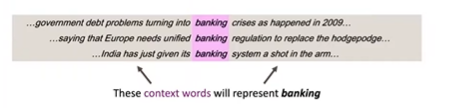 <br>
_Figure 1. Distributional Semantics._

## WordNet

__WordNet__ groups together words that are syonymous but is limited in capability.

<div class="alert alert-block alert-info"> 

**What is WordNet?**

WordNET is a lexical **database** of words in more than 200 languages in which we have adjectives, adverbs, nouns, and verbs grouped differently into a set of cognitive synonyms, where **each word in the database is expressing its distinct concept**. 

The cognitive synonyms which are called **synsets** are presented in lexical and semantic relations.

Synonyms--words that denote the same concept and are interchangeable in many contexts--are grouped into unordered sets (synsets)

[WordNet](https://en.wikipedia.org/wiki/WordNet#:~:text=WordNet%20is%20a%20lexical%20database,of%20a%20dictionary%20and%20thesaurus)


WordNet can be used using nltk package in python, let's understand using an example. Nltk stands for Natural Language Toolkit, is a python package for traditional natural language processing tasks.

```bash
pip install -U nltk
```

In [ ]:
# Step 1 Download teh wordnet dataset
import nltk
nltk.download('wordnet')

In [4]:
# import wordnet
from nltk.corpus import wordnet as wn

# look up a word using synsets(): a set of synonyms that share a common meaning.
# a synset is identified with a 3-part name of the form: word.pos.nn [Word, part of speech, number of synsets]

print('Synsets for the word "invite" in WordNet:\n\n')
for synset in wn.synsets('invite'):
    print(synset)

Synsets for the word "invite" in WordNet:


Synset('invite.n.01')
Synset('invite.v.01')
Synset('invite.v.02')
Synset('tempt.v.03')
Synset('invite.v.04')
Synset('invite.v.05')
Synset('invite.v.06')
Synset('invite.v.07')
Synset('receive.v.05')


**What do we interpret from this ?**

Let's take some examples and understand:

- Synset('invite.n.01')
    - **Part of Speech**: Noun (n)
    - **Interpretation**: Represents the noun form of "invite," likely meaning an invitation.
    
- Synset('invite.v.01')
    - **Part of Speech**: Verb (v)
    - **Interpretation**: Represents the primary verb sense of "invite," such as to request someone's presence.

- Synset('invite.v.02')
    - **Part of Speech**: Verb (v)
    - **Interpretation**: Another verb sense of "invite," possibly with a different nuance, like enticing or attracting.
- .
- .


The word "**invite**" has multiple synsets, both as a **noun** and a **verb**, each capturing a different meaning or usage.

The inclusion of **tempt.v.03** and **receive.v.05** implies that some senses of "**invite**" are closely related or synonymous with "**tempt**" and "**receive**," respectively.

"**Invite**" functions as both a noun and a verb, and WordNet categorizes its meanings accordingly.


We can further fetch the definition, examples and hypernyms of the specified synset.

In [8]:
# check definition of a synset
print('Definition:')
print('The definition for invite as a noun:\n\n', wn.synset('invite.n.01').definition())
print("------------------------------------------")
# check the related examples
print('Examples')
print('The definition for invite as a noun:\n\n', wn.synset('invite.n.01').examples())
print("------------------------------------------")

# check the hypernyms
print('Hypernyms')
print('The hypernyms for invite as a noun:\n\n', wn.synset('invite.n.01').hypernyms())

Definition:
The definition for invite as a noun:

 a colloquial expression for invitation
------------------------------------------
Examples
The definition for invite as a noun:

 ["he didn't get no invite to the party"]
------------------------------------------
Hypernyms
The hypernyms for invite as a noun:

 [Synset('invitation.n.01')]


#### Limitations

- Great as a resource but missing nuance • e.g., “proficient” is listed as a synonym for “good” This is only correct in some contexts

- Missing new meanings of words • e.g., wicked, badass, nifty, wizard, genius, ninja, bombest
- Impossible to keep up-to-date!
- Subjective
- **Requires human labor to create and adapt**
- Can’t compute accurate word similarity
    - nltk does provide a way to compute word similarity, but it is too simplistic and subjective: synset1.path_similarity(synset2): Return a score denoting how similar two word senses are, based on the shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy. The score is in the range 0 to 1. See: http://www.nltk.org/howto/wordnet.html

## Word2Vec

__Word2vec__ is a 2013 framework for <mark>learning word vectors </mark>. 

👉 The idea is to go through a large corpus/body of text and define a vocabulary table where each word is represented by an embedding vector. 

👉 Go through each position $t$ in the text with center word $c$ and context words $o$ and calculate the **probability of $o$ given $c$**. We adjust the word vectors to maximize this probability.

👉 We Keep adjusting the word vectors to maximize this probability (backpropogation)

![image.png](./img/stanford/1-word2vec-example.png) <br>
_Figure 2. Word2vec._

### Algorithm

**Objective function**

For each position $t = 1, ... , 𝑇$, predict context words within a window of fixed size $m$, given center word $w_j$. Data likelihood:

$$Likelihood = L(\theta) = \prod_{t}^{T} \prod_{\substack{-m \leq j \leq m \\ j \neq m}} P(w_{t+j}|{w_{t}; \theta}) \tag{1}$$

The objective/loss/cost function for $(1)$ is the average negative log likelihood: 

$$J(\theta) = - \frac{1}{T} logL(\theta) = - \frac{1}{T} \sum_{t=1}^{T} \sum_{\substack{-m \leq j \leq m \\ j \neq m}} log P(w_{t+j}|{w_{t}; \theta}) \tag{2}$$


**Prediction function**

Denote by $v_{c}$ and $v_{o}$ respectively the center word and the context word, using **softmax**, we get the following prediction function of predicting $v_{c}$ given $v_{o}$ and the vocubulary $V$:

$$P(o|c) = \frac{exp(\mathbf{u_{o}^{T} v_{c}})}{\sum_{w \in V} exp(\mathbf{u_{w}^{T} v_{c}})} \tag{3}$$

<br>
<br>

<img src='./img/stanford/1-softmax.png'>

While **Word2vec** is a framework for learning embedding vectors. There are also variants of this framework. 

* __Skip-grams (SG)__ predicts context words based on center word (this is word2vec)
* __Continuous Bag of Words (CBOW)__ predicts the center word from context words

## Skip-Gram With Negative Sampling

$$
P(o ~|~ c) = \frac{exp(u_{o}^T v_c)}{\sum_{w \in V} exp(u_{w}^T v_c)}
$$

Consider the above equation in the previous lecture. It iterates through all the words in the vocabulary in the denominator. This is infeasible. So instead, we sample a $k$ subset of negative pairs/samples. The rewritten objective function is:

$$
J_{t}(\theta) = log \sigma (u_{o}^{T} v_{c}) + \sum_{i = 1}^{k} \mathbb{E}_{j \sim P(w)} [log \sigma (-u_{j}^{T}v_{c})] \hspace{1em} (Eq.~1)\\
$$

This objective function maximizes the probability that real context word appears for a given center word and minimizes the probability that random context words appear around a given center word.

The negative words are sampled such that less frequent words are sampled more often.

## Co-occurrence Vectors

Co-occurrence matrices are used to model the relationships between words. The matrix is a $ V \times V $ matrix where $V$ is the number of words in the vocabulary. 

The $i$ th and $j$ th entry of the matrix is the number of times that word $i$ and $j$ co-occur in the corpus.

![image.png](./img/stanford/2-cooccurrence-matrix-example.png) <br>
_Figure 1. Co-Occurrence Matrix._

This is a way of modeling the relationships between words. There are 2 ways to make a co-occurrence matrix:
* Using a sliding window over a corpus of text 
* Using the entire document 
    * this way is great at capturing general topics in the document (global context)
    
### Limitations
- Simple count co-occurrence vectors
- Vectors increase in size with vocabulary
- Very high dimensional: require a lot of storage (though sparse)
- Subsequent classification models have sparsity issues, Models are less robust

Let's understand **How to reduce the dimensionality**

### Dimensionality Reduction

Idea is to store “most” of the important information in a fixed, small number of dimensions: a dense vector
, Usually 25–1000 dimensions, similar to word2vec


<div class="alert alert-block alert-info">

Let's first understand **Single Value Decomposition** briefly

Singular Value Decomposition is a method of decomposing a matrix into three other matrices, revealing many of the useful and intrinsic properties of the original matrix. Formally, for any real or complex $( m \times n )$ matrix $A$, SVD is given by:

$$
A = U \Sigma V^T
$$

Where:
- **$( U )$** is an $( m \times m )$ orthogonal matrix whose columns are called the left singular vectors of $A$.
- **$\Sigma $** is an $ m \times n $ diagonal matrix containing the singular values of $A$ in descending order.
- **$V^T$** (the transpose of $V$) is an $n \times n$ orthogonal matrix whose rows are called the right singular vectors of $A$.

</div>

[Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)



<img src='./img/stanford/2-svd.png'> <br>
_Figure 2. Reducing the dimensionality of co-occurrence matrices via SVD._

SVD on raw counts doesn't work well. 

Problems:

- The dimensions of the matrix change very often (new words are added very frequently and corpus changes in size).
- The matrix is extremely sparse since most words do not co-occur.
- The matrix is very high dimensional in general (≈ 106 × 106)
- Quadratic cost to train (i.e. to perform SVD)
- Requires the incorporation of some hacks on X to account for the drastic imbalance in word frequency (see below)



## GloVe

!<img src='./img/stanford/2-counts-based-versus-direct-prediction.png'> <br>
_Figure 3. Count-based vs direct prediction._

GloVe combines the predictive modeling that is in the purple box with the methods for word similarity in the blue box. It also has an additional feature: encoding meaning components in vector differences.

Basic idea is <mark>Ratios of co-occurrence probabilities can encode meaning components </mark>


<img src='./img/stanford/2-glove-basic-ideas.png' width='600' height='300'>

<br>

_Figure 4. Encoding meaning in vector differences._

To create an objective function from this idea, we see that a __log-bilinear model__ can be used to capture the ratio of co-occurrence probabilities.

$$
w_i ~ \cdot ~ w_j = log P(i~|~j)\\
w_x ~ \cdot (w_a - w_b) =log \frac{P(x~|~a)}{P(x~|~b)}\\
$$

__GloVe__ uses the following objective function:

$$
J = \sum_{i, j = 1}^{V} f(X_{ij})(\underbrace{w_i^T \tilde{w}_j + b_i + \tilde{b}_j}_{pred} - \underbrace{log X_{ij}}_{label})^2 \hspace{1em} (Eq.~2)\\
$$

$w_i$ and $w_j$ are embedding vectors for the $i$-th and $j$-th words. They also have their corresponding bias terms. This objective function can directly optimize on the ground truth co-occurrence matrix $X$. The function $f(X_{ij})$ is shown below. Its purpose is to limit the frequency of very frequent words.

<img src='./img/stanford/2-glove-subsampling-f.png' width='400' height='200'>
<br>

_Figure 5. F function in GloVe._

## Evaluating Word Vectors

There are 2 ways to evaluate word vectors:
- **Intrinsic**:
    - Evaluation on a specific/intermediate subtask
    - Fast to compute
    - Helps to understand that system
    - **Not clear if really helpful unless correlation to real task is established**
- **Extrinsic**:
    - Evaluation on a real task
    - Can take a long time to compute accuracy
    - Unclear if the subsystem is the problem or its interaction or other subsystems
    - Unstable metrics: if replacing exactly one subsystem with another, accuracy may just be improved
    
    
For **intrinsic word vector evaluation**, you can evaluate it like: woman - man + king = queen.

$$
d = \underset{i}{argmax} \frac{(x_b - x_a + x_c)^T x_i}{||x_b - x_a + x_c||} \hspace{1em} (Eq.~3)\\
$$

In GloVe, they found a dimension parameter of 300 was good with more data leading to better results.

There are shortcomings to GloVe. For one, many words have multiple meanings. Sarcasm and other things like mood and tone are harder to pick up.

One idea is to have multiple sensor vectors for all the definitions of a word. Though in practice it is often enough to just have 1 embedding vector per word as it is a weighted sum (or linear superposition) of all the definitions of that word. Because of _sparse encoding_ (high-dimensional embedding dimension), we can actually separate out the senses.

# Dependency Parsing
---

Dependency parsing is the process of inferring the syntactic structure of a sentence. 

## Syntactic structure: constituency and dependency

### **<mark>Constituency</mark>**

- Also known as **phrase structure grammar** or **context-free grammars (CFGs)**

- Key assumption: **Phrase structure organizes words into nested constituents**
    - Words (basic units, assigned with parts of speech) $\longrightarrow$ phrases $\longrightarrow$ bigger phrases $\longrightarrow$ ... 
- Example:

<img src='./img/stanford/5-constituency.png' width='600' height='300'>

<br>

Phrase structure does this by defining a __lexicon__ and a __grammar__. 

<mark>The lexicon is simply the type of word (noun, preposition, verb, etc) mapped to the word (a dictionary mapping).</mark>.

The grammar is a list of rules that map from, say, a noun to a verb, or a verb to a preposition, etc. This is considered __context-free grammar (CFG)__ because it doesn't account for what phrases would be generated.

The other way at viewing linguistic structure is __dependency structure__ and that is by looking at a word in a sentence and seeing what other words in the sentence modifies it.

### **<mark>Dependency</mark>**

- Dependency structure: **which words depend on (modify or are arguments of) which other words**; semantic relationship

- Example (from the internet):


<img src='./img/stanford/5-dependency-example.png' width='400' height='200'>

<br>

- Why dependency?
    - We need to understand sentence structure in order to be able to interpret language correctly
    - Humans communicate complex ideas by composing words together into bigger units to convey complex meanings
    - We need to know what is connected to what
    - Otehrwise, ambiguity
    

- Dependency paths identify semantic relations
    - e.g.: The result demonstrated that KaiC interacts rhythmically with SasA, KaiA, and KaiB.


<img src='./img/stanford/5-dependency-example2.png' width='400' height='200'>

Below are some examples of ambiguities in the English language (and thus why sentence structure is important):

* **Prepositional phrase attachment ambiguity**
    * <mark>San Jose cops kill man with knife</mark>
    * did the cops kill a man holding a knife or did they use a knife to kill him
* **Coordination scope ambiguity**
    * <mark>Shuttle veteran and longtime NASA executive Fred Gregory appointed to board</mark>
    * is this describing 1 person (Fred Gregory as the shuttle veteran and longtime NASA executive)
    * or is this describing 2 people (a shuttle veteran and Fred Gregory who is a longtime NASA executive)
* **Adjectival/adverbial modifier ambiguity**
    * <mark>Students get first hand job experience</mark>
        * what is this saying?
* **Verb phrase attachment ambiguity**
    * <mark>Mutilated body washes up on Rio beach to be used for Olympics beach volleyball </mark>
        * is the mutilated body going to be used as a volleyball?

## Dependency grammar and dependency structure

Dependency syntax postulates that syntactic structure consists of relations between lexical items, **normally binary asymmetric relations** (“arrows”) called **dependencies**.

Currently, there is no unified method to represent dependency structures graphically. For example, in the notebook, the arrows start from the head and point to the dependent. However, some may have the arrows start from the dependent and point to the head. Nevertheless, the following two methods are two basic ways to represent dependency structures in a graph. 


<br>

**<mark>Represented by a connected, acyclic, single-head tree**</mark>

<img src='./img/stanford/5-dependency grammar.png' width='600' height='300'>

<br>

**<mark>Represented by dependency arcs (curved arrows) above a sentence</mark>**
- Usually add a fake ROOT so every word is a dependent of precisely 1 other node

<img src='./img/stanford/5-dependency-grammar-repr.png' width='600' height='300'>

<br>

 <br>

![image.png](attachment:image.png) <br>
_Figure 3. Dependency Structure convention._

Dependency structure is usually done by drawing an arrow from the head to the dependent word or the words that modify the head. We also usually add a fake ROOT so every word is dependent on roughly 1 other node.

A __dependency parser__ is basically an algorithm that will generate some quantified format of the dependency structure you see in Figure 3. 

A __tree bank__ is a huge collection of hand-annotated trees.

Usually, we start with writing a grammar or lexicon, but with tree banks, it's a little different. Granted, treebanks are slower and are initially less useful than writing a grammar by hand. However, treebanks are reusable for many different tasks (dependency parsing, other things can be built to extract information from parsing). They can also be used to evaluate NLP systems. I'm imagining a hand-annotated treebank can be compared to different dependency parsers to see which algorithm works best.

## Building A Dependency Parser

Dependency parsers leverage 4 common themes:
- Bilexical affinities 
    - basically how likely is one word to be dependent on another word (it's a pairing like discussion -> issues)
- Dependency distance
    - dependencies are usually between nearby words
- Intervening material
    - dependencies rarely span intervening verbs or punctuation
- Valency of heads
    - how many dependents on which side are usual for a head?
    
To perform dependency parsing, **we parse through a sentence and choose for each word what other word is it a dependent of**. 

There are some constraints:

<img src='./img/stanford/5-parsing-general.png' width='600' height='300'> <br>
_Figure 4. Crossing arcs._